# Assignment 3 - Multi-Class Classification & Neural Networks

In [30]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from scipy.optimize import minimize
from scipy.io import loadmat

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)

#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

## 1. Multi-class Classification
### 1.1 Dataset

In [31]:
data = loadmat('ex3/ex3data1.mat')
weights = loadmat('ex3/ex3weights.mat')
print data.keys()
print weights.keys()

['y', 'X', '__version__', '__header__', '__globals__']
['Theta2', '__version__', '__header__', 'Theta1', '__globals__']


In [32]:
X = np.c_[np.ones((data['X'].shape[0], 1)), data['X']]
y = data['y']
print X.shape
print y.shape

(5000L, 401L)
(5000L, 1L)


In [33]:
theta1, theta2 = weights['Theta1'], weights['Theta2']
print theta1.shape
print theta2.shape

(25L, 401L)
(10L, 26L)


### 1.2 Visualizing the data

(-0.5, 399.5, 19.5, -0.5)

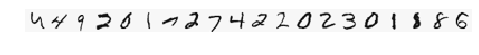

In [34]:
sample = np.random.choice(X.shape[0], 20)
plt.imshow(X[sample, 1:].reshape(-1, 20).T)
plt.axis('off')

### 1.3 Vectorizing Logistic Regression

#### Vectorized Cost Function
$$J(\theta) = -\frac{1}{m} \cdot \Big( y^T \log\big(g(X\theta)\big) + (1-y)^T\log\big(1-g(X\theta)\big)\Big)+\frac{\lambda}{2m}\sum_{j=1}^{n}\theta_j^2$$

In [35]:
def sigmoid(z):
    return(1 / (1 + np.exp(-z)))

In [36]:
def costFunction(theta, reg, X, y):
    m = y.size
    h = sigmoid(X.dot(theta))
    J = -1.0/m * (y.T.dot(np.log(h)) + (1.0-y).T.dot(np.log(1.0-h))) + reg/2.0/m * np.sum(np.square(theta[1:]))
    return J

In [37]:
def gradient(theta, reg, X, y):
    m = y.size
    h = sigmoid(X.dot(theta.reshape(-1, 1)))
    grad = (1.0/m)*X.T.dot(h-y) + (reg/m)*np.r_[[[0]],theta[1:].reshape(-1,1)]
    
    return grad.flatten()

### 1.4 One-vs-all Classification

In [38]:
def oneVsAll(features, classes, n_labels, reg):
    initial_theta = np.zeros((X.shape[1],1))  # 401x1
    all_theta = np.zeros((n_labels, X.shape[1])) #10x401

    for c in np.arange(1, n_labels+1):
        res = minimize(costFunction, initial_theta, args=(reg, features, (classes == c)*1), method=None,
                       jac=gradient, options={'maxiter':50})
        all_theta[c-1] = res.x
    return(all_theta)

In [39]:
theta = oneVsAll(X, y, 10, 0.1)

In [40]:
def predictOneVsAll(all_theta, features):
    probs = sigmoid(X.dot(all_theta.T))
        
    # Adding one because Python uses zero based indexing for the 10 columns (0-9),
    # while the 10 classes are numbered from 1 to 10.
    return(np.argmax(probs, axis=1)+1)

In [41]:
pred = predictOneVsAll(theta, X)
print('Training set accuracy: {} %'.format(np.mean(pred == y.ravel())*100))

Training set accuracy: 93.24 %


### Multiclass Logistic Regression with scikit-learn

In [42]:
regr = LogisticRegression(C=10, penalty='l2', solver='liblinear')
regr.fit(X[:, 1:], y.ravel())

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [48]:
pred2 = regr.predict(X[:, 1:])
print('Training set accuracy: {} %'.format(np.mean(pred2 == y.ravel())*100))

Training set accuracy: 96.5 %


## 2. Neural Network
### 2.1 Model Representation

In [49]:
def predict(theta_1, theta_2, features):
    z2 = theta_1.dot(features.T)
    a2 = np.c_[np.ones((data['X'].shape[0],1)), sigmoid(z2).T]
    
    z3 = a2.dot(theta_2.T)
    a3 = sigmoid(z3)
        
    return(np.argmax(a3, axis=1)+1)

In [50]:
pred = predict(theta1, theta2, X)
print('Training set accuracy: {} %'.format(np.mean(pred == y.ravel())*100))

Training set accuracy: 97.52 %
